In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('forwarders_rating_saves_X.csv')
y = pd.read_csv('forwarders_rating_saves_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   matches_played  aerials_l  aerials_w   assists  chances2score  clearances  \
0             1.0        0.0        0.0  0.111111       0.111922    0.250000   
1             0.0        1.0        0.0  0.027778       0.014599    0.000000   
2             1.0        0.0        0.0  0.000000       0.021898    0.018443   
3             0.0        0.0        1.0  0.055556       0.043796    0.014344   
4             1.0        0.0        0.0  0.027778       0.065693    0.030738   

   countattack  crosses_acc  crosses_inacc  dangmistakes  ...  \
0     0.230769     0.138095            0.1      0.028926  ...   
1     0.115385     0.042857            0.0      0.024793  ...   
2     0.000000     0.028571            0.0      0.037190  ...   
3     0.000000     0.119048            0.0      0.078512  ...   
4     0.000000     0.000000            0.0      0.024793  ...   

   betweenness_centrality  closeness_centrality  flow_centrality  \
0                0.090278                 0.125         0.58

In [4]:
X.columns

Index(['matches_played', 'aerials_l', 'aerials_w', 'assists', 'chances2score',
       'clearances', 'countattack', 'crosses_acc', 'crosses_inacc',
       'dangmistakes', 'drib_success', 'drib_unsuccess', 'dribbled_past',
       'fouls', 'grduels_l', 'grduels_w', 'interceptions', 'keypasses',
       'lballs_acc', 'lballs_inacc', 'missed_penalties', 'offsides',
       'owngoals', 'passes_acc', 'passes_inacc', 'poss_lost', 'rcards',
       'shots_offtarget', 'shots_ontarget', 'shotsblocked', 'stop_shots',
       'tackles', 'tballs_acc', 'tballs_inacc', 'touches', 'wasfouled',
       'ycards', 'degree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'flow_centrality', 'betweenness2goals',
       'game_duration', 'flow_success', 'minutesPlayed', 'pos_role_FW',
       'pos_role_FWL', 'pos_role_FWR'],
      dtype='object')

In [5]:
X.head()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,...,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,flow_success,minutesPlayed,pos_role_FW,pos_role_FWL,pos_role_FWR
0,1.0,0.0,0.0,0.111111,0.111922,0.250000,0.230769,0.138095,0.1,0.028926,...,0.090278,0.125,0.581987,0.399607,0.463954,0.370879,0.364092,0.0,0.557731,0.562609
1,0.0,1.0,0.0,0.027778,0.014599,0.000000,0.115385,0.042857,0.0,0.024793,...,0.062500,0.000,0.798535,0.493390,0.664571,0.733871,0.204678,0.0,0.579471,0.702970
2,1.0,0.0,0.0,0.000000,0.021898,0.018443,0.000000,0.028571,0.0,0.037190,...,0.020833,0.000,0.428571,0.363973,0.444444,0.212689,0.000000,0.0,0.321429,0.415842
3,0.0,0.0,1.0,0.055556,0.043796,0.014344,0.000000,0.119048,0.0,0.078512,...,0.062500,0.000,0.737729,0.426075,0.557982,0.500784,0.100000,0.0,0.632590,0.580198
4,1.0,0.0,0.0,0.027778,0.065693,0.030738,0.000000,0.000000,0.0,0.024793,...,0.125000,0.000,0.360544,0.189577,0.309427,0.147818,0.000000,0.0,0.254638,0.422914


In [6]:
y.head()

,goals
0,9
1,3
2,0
3,6
4,0


In [7]:
#removing columns;
import pandas as pd

# Assuming X is your DataFrame
# List of columns to drop
columns_to_drop =['betweenness_centrality',
 'clearances',
 'crosses_acc',
 'dangmistakes',
 'degree_centrality',
 'drib_unsuccess',
 'flow_success',
 'game_duration',
 'grduels_l',
 'interceptions',
 'keypasses',
 'lballs_acc',
 'lballs_inacc',
 'owngoals',
 'passes_inacc',
 'rcards',
 'shots_offtarget',
 'shots_ontarget',
 'stop_shots',
 'tackles',
 'tballs_acc',
 'ycards'] 

# Drop the specified columns in place
X.drop(columns=columns_to_drop, inplace=True)

# Optionally, check the resulting DataFrame
print(X.head())

   matches_played  aerials_l  aerials_w   assists  chances2score  countattack  \
0             1.0        0.0        0.0  0.111111       0.111922     0.230769   
1             0.0        1.0        0.0  0.027778       0.014599     0.115385   
2             1.0        0.0        0.0  0.000000       0.021898     0.000000   
3             0.0        0.0        1.0  0.055556       0.043796     0.000000   
4             1.0        0.0        0.0  0.027778       0.065693     0.000000   

   crosses_inacc  drib_success  dribbled_past     fouls  ...  tballs_inacc  \
0            0.1      0.094595           0.00  0.000000  ...      0.285714   
1            0.0      0.324324           0.25  0.121622  ...      0.000000   
2            0.0      0.000000           0.00  0.020270  ...      0.000000   
3            0.0      0.000000           0.00  0.040541  ...      0.214286   
4            0.0      0.000000           0.00  0.000000  ...      0.000000   

    touches  wasfouled  closeness_centrality

## Modelling

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 249
Validation set size: 83
Test set size: 84


In [10]:
X_train.head()

,matches_played,aerials_l,aerials_w,assists,chances2score,countattack,crosses_inacc,drib_success,dribbled_past,fouls,...,tballs_inacc,touches,wasfouled,closeness_centrality,flow_centrality,betweenness2goals,minutesPlayed,pos_role_FW,pos_role_FWL,pos_role_FWR
297,0.0,0.0,1.0,0.111111,0.058394,0.000000,0.142857,0.162162,0.000000,0.135135,...,0.000000,0.119048,0.000000,0.083333,0.589841,0.470816,0.098086,0.0,0.328265,0.645545
257,0.0,0.0,1.0,0.000000,0.014599,0.000000,0.042857,0.000000,0.000000,0.000000,...,0.214286,0.071429,0.071429,0.000000,0.619048,0.465078,0.000000,0.0,0.226351,0.623762
151,0.0,0.0,1.0,0.111111,0.051095,0.000000,0.042857,0.000000,0.000000,0.060811,...,0.000000,0.142857,0.000000,0.125000,0.436825,0.542624,0.133929,0.0,0.484803,0.500990
374,1.0,0.0,0.0,0.055556,0.136253,0.153846,0.114286,0.054054,0.333333,0.081081,...,0.000000,0.142857,0.190476,0.333333,0.587302,0.529789,0.075758,0.0,0.356151,0.627063
230,1.0,0.0,0.0,0.222222,0.255474,0.000000,0.471429,0.040541,0.000000,0.040541,...,0.000000,0.071429,0.000000,0.000000,0.592945,0.549112,0.105820,0.0,0.408525,0.666667


In [11]:
X_val.shape

(83, 26)

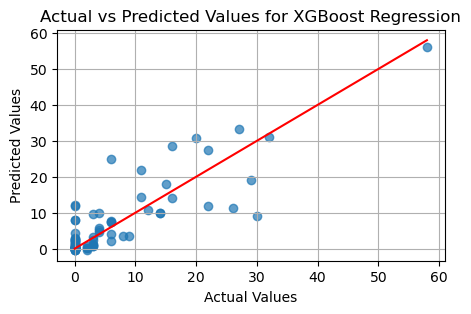

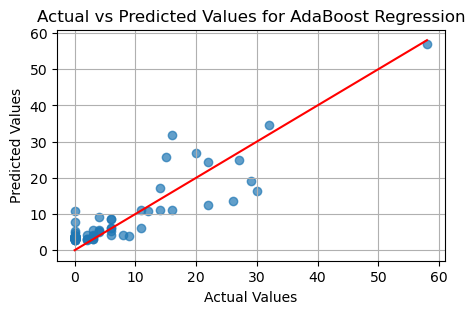

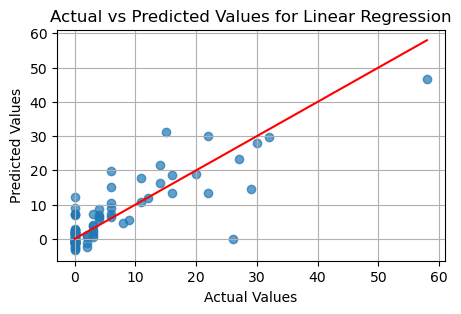

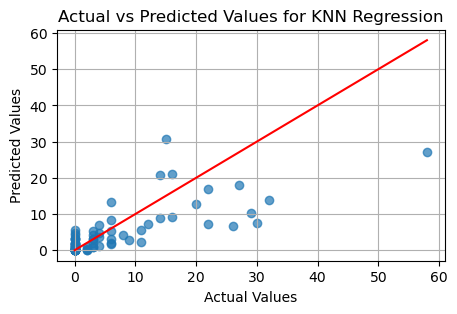

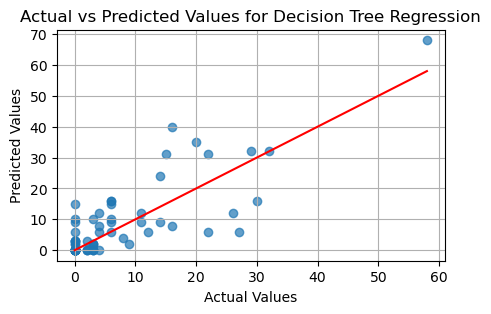

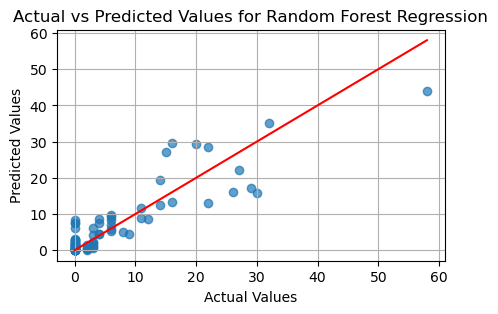

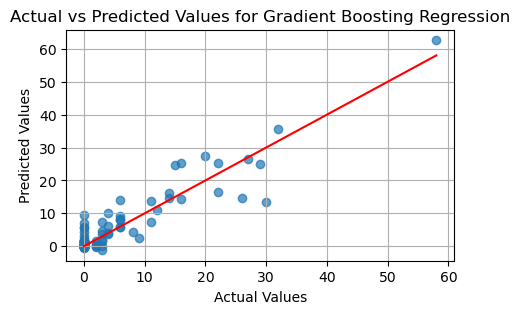

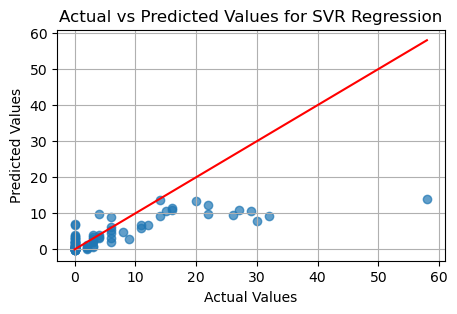

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


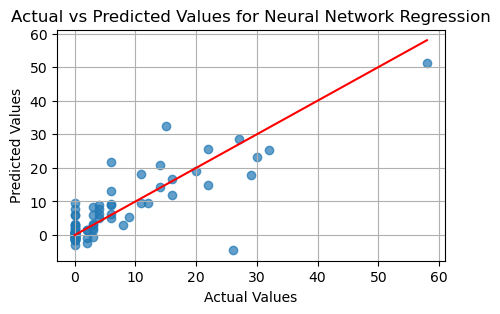

                          Model       MSE     RMSE       R2      MAE        R
0            XGBoost Regression  29.19150  5.40292  0.70544  3.22706  0.85505
1           AdaBoost Regression  21.60307  4.64791  0.78201  3.58745  0.90307
2             Linear Regression  29.88042  5.46630  0.69849  3.42404  0.84363
3                KNN Regression  45.14169  6.71876  0.54449  3.64578  0.76716
4      Decision Tree Regression  43.55422  6.59956  0.56051  3.86747  0.82452
5      Random Forest Regression  20.24132  4.49904  0.79575  2.80012  0.89357
6  Gradient Boosting Regression  15.24541  3.90454  0.84616  2.45157  0.92704
7                SVR Regression  55.49087  7.44922  0.44006  3.63763  0.80059
8     Neural Network Regression  29.66395  5.44646  0.70067  3.15467  0.84401


In [12]:
# Features after removing correlated features, using base model, evaluation on val
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from scipy.stats import pearsonr

# Ensure y_train and y_val are numpy arrays
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()


# Define models
random_state = 42
models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression'),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression'),
    (LinearRegression(), 'Linear Regression'),
    (KNeighborsRegressor(), 'KNN Regression'),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression'),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression'),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression'),
    (SVR(), 'SVR Regression'),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression')
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R2', 'MAE','R'])

# Train, predict and evaluate models
metrics_list = []

for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r, _ = pearsonr(y_val, y_pred)
    
    metrics_list.append({
        'Model': name, 
        'MSE': f'{mse:.5f}', 
        'RMSE': f'{rmse:.5f}', 
        'R2': f'{r2:.5f}', 
        'MAE': f'{mae:.5f}',
        'R': f'{r:.5f}'
    })
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()
    

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

Training XGBoost Regression...
Best parameters for XGBoost Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


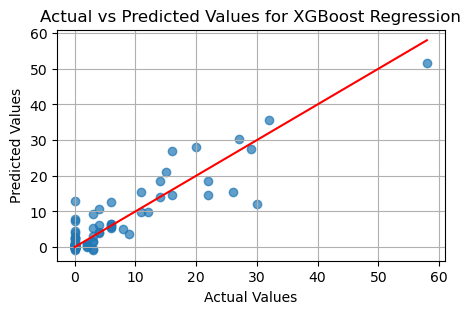

Training AdaBoost Regression...
Best parameters for AdaBoost Regression: {'learning_rate': 0.1, 'n_estimators': 100}


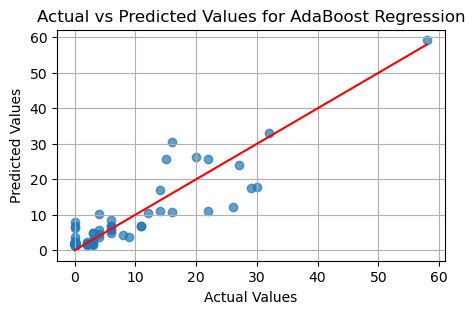

Training KNN Regression...
Best parameters for KNN Regression: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}


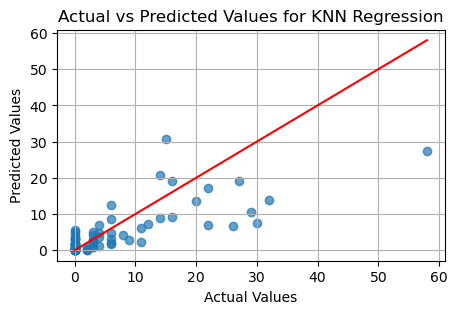

Training Decision Tree Regression...
Best parameters for Decision Tree Regression: {'max_depth': None, 'min_samples_split': 20}


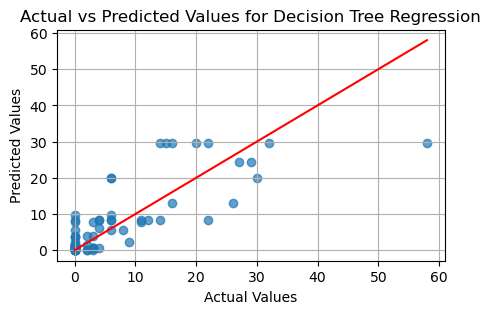

Training Random Forest Regression...
Best parameters for Random Forest Regression: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


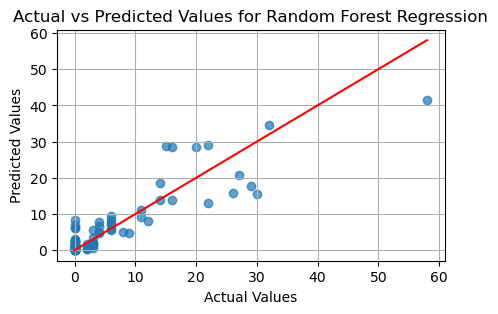

Training Gradient Boosting Regression...
Best parameters for Gradient Boosting Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


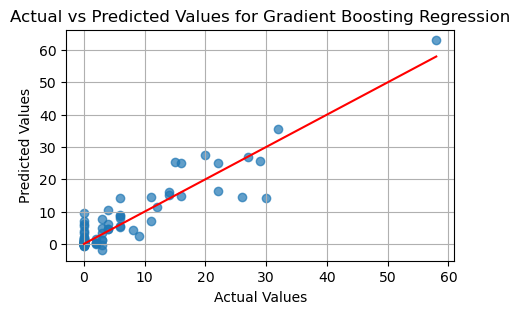

Training SVR Regression...
Best parameters for SVR Regression: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


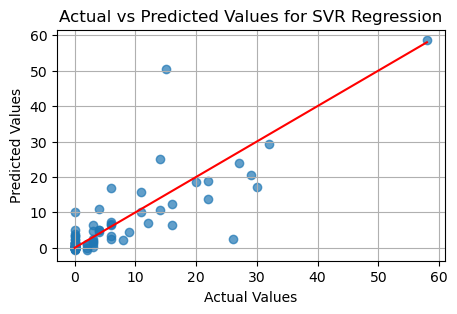

Training Neural Network Regression...
Best parameters for Neural Network Regression: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


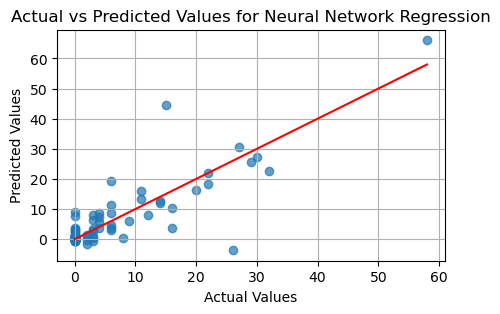

                          Model        MSE       MAE        R2      RMSE
0            XGBoost Regression  16.955950  2.474921  0.828904  4.117760
1           AdaBoost Regression  17.562622  2.837684  0.822782  4.190778
2                KNN Regression  44.406407  3.585310  0.551912  6.663813
3      Decision Tree Regression  37.089549  3.622575  0.625744  6.090119
4      Random Forest Regression  20.640660  2.717349  0.791723  4.543199
5  Gradient Boosting Regression  15.434981  2.457056  0.844252  3.928738
6                SVR Regression  35.039861  2.927492  0.646426  5.919448
7     Neural Network Regression  34.109036  3.012736  0.655819  5.840294


In [13]:
# Tuning the val data better with parameters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models and parameters for GridSearchCV
random_state = 42

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    })
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])

# Train, predict and evaluate models
metrics_list = []

for model, name, params in models:
    print(f"Training {name}...")
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    grid_search = GridSearchCV(model, param_grid=params, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")
    
    y_pred = best_model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mse)
    
    metrics_list.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse})
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

                          Model      RMSE        MSE       MAE        R2  \
0            XGBoost Regression  3.261005  10.634151  2.004348  0.755959   
1           AdaBoost Regression  3.895954  15.178454  2.555532  0.651673   
2                KNN Regression  4.241627  17.991400  1.901962  0.587119   
3      Decision Tree Regression  4.764867  22.703956  2.672407  0.478971   
4      Random Forest Regression  3.414435  11.658367  1.885952  0.732454   
5  Gradient Boosting Regression  3.426552  11.741261  1.936414  0.730552   
6                SVR Regression  3.547354  12.583721  1.915532  0.711219   
7     Neural Network Regression  3.521194  12.398809  2.215492  0.715462   

          R  
0  0.917683  
1  0.896697  
2  0.770142  
3  0.805506  
4  0.920832  
5  0.922331  
6  0.844388  
7  0.866955  


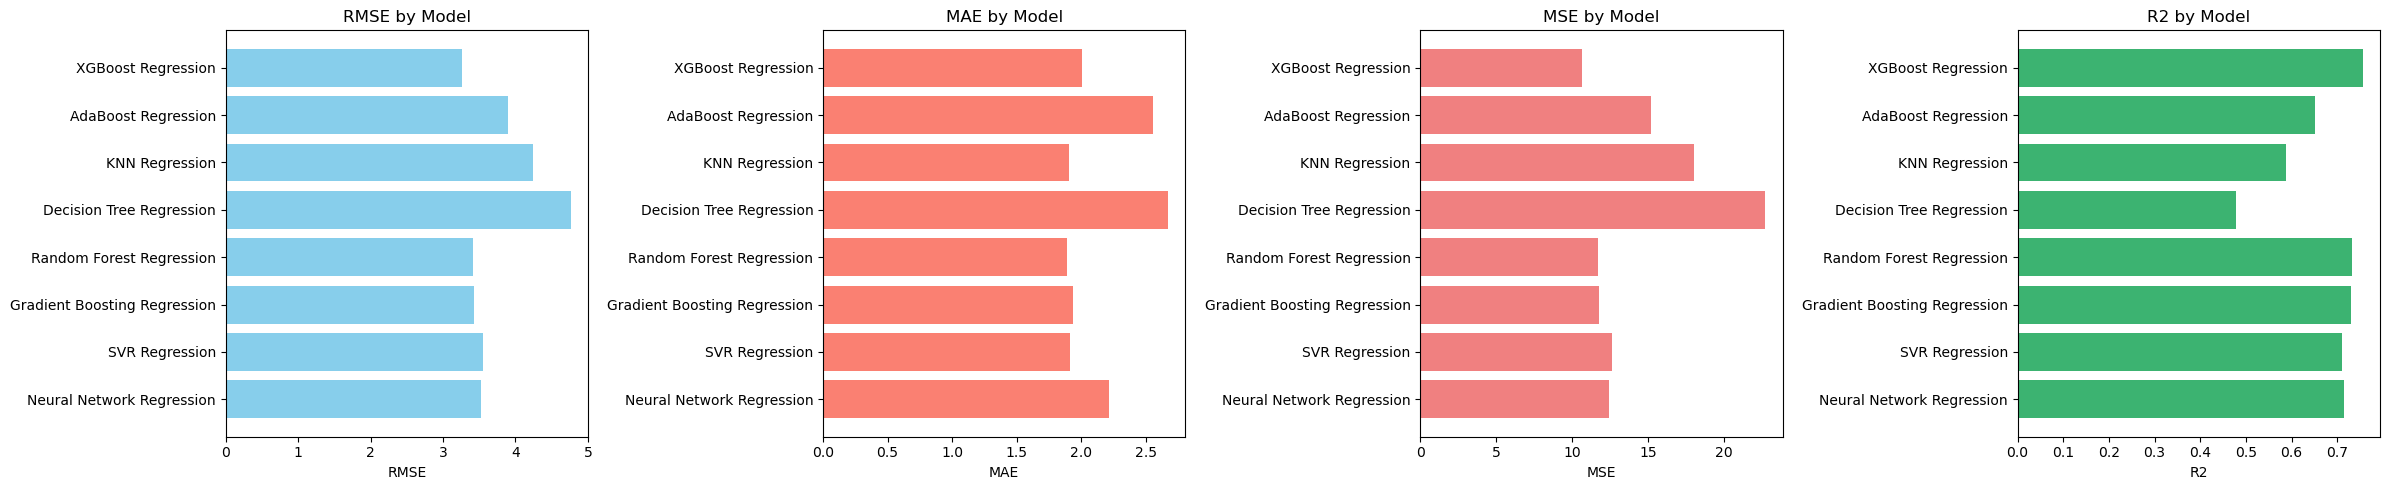

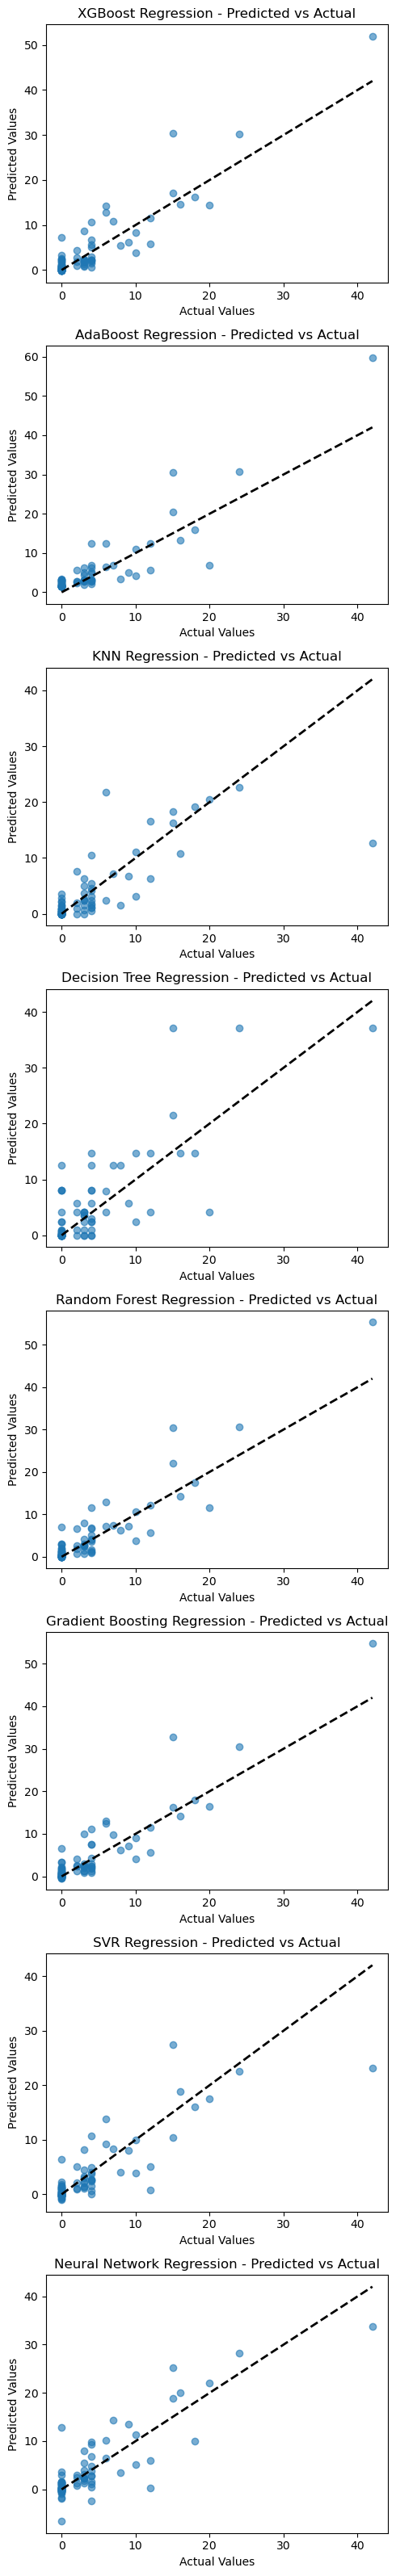

In [14]:
#using the best parameters on  features after correlation added on the test set
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])


# Define models with the best parameters found

            

best_params = {
    'XGBoost Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1},
    'KNN Regression': {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'ball_tree'},
    'Decision Tree Regression': {'max_depth': None, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2},
    'Gradient Boosting Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'poly', 'gamma': 'scale'},
    'Neural Network Regression': {'hidden_layer_sizes': (50,50), 'activation': 'relu', 'solver': 'adam'},
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
        
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return predictions, rmse, mae, mse, r2,r

# Evaluate each model
test_results = []
predictions_dict = {}

for name, model in models.items():
    predictions, rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val, y_train_val, X_test, y_test)
    test_results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'R':r
    })
    predictions_dict[name] = predictions

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'RMSE', 'MSE', 'MAE', 'R2','R']])

# Visualization of the performance metrics
def plot_metrics(df):
    fig, axes = plt.subplots(1, 4, figsize=(24, 5))

    # RMSE
    axes[0].barh(df['Model'], df['RMSE'], color='skyblue')
    axes[0].set_title('RMSE by Model')
    axes[0].set_xlabel('RMSE')
    axes[0].invert_yaxis()

    # MAE
    axes[1].barh(df['Model'], df['MAE'], color='salmon')
    axes[1].set_title('MAE by Model')
    axes[1].set_xlabel('MAE')
    axes[1].invert_yaxis()

    # MSE
    axes[2].barh(df['Model'], df['MSE'], color='lightcoral')
    axes[2].set_title('MSE by Model')
    axes[2].set_xlabel('MSE')
    axes[2].invert_yaxis()

    # R2
    axes[3].barh(df['Model'], df['R2'], color='mediumseagreen')
    axes[3].set_title('R2 by Model')
    axes[3].set_xlabel('R2')
    axes[3].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(test_results_df)

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(5, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

                 Feature  Importance
3                assists    0.571785
22         minutesPlayed    0.130018
24          pos_role_FWL    0.083767
18             wasfouled    0.040893
11      missed_penalties    0.033985
21     betweenness2goals    0.016783
4          chances2score    0.015525
19  closeness_centrality    0.014674
13            passes_acc    0.013848
16          tballs_inacc    0.012198
23           pos_role_FW    0.011364
6          crosses_inacc    0.010631
17               touches    0.009513
9                  fouls    0.007050
25          pos_role_FWR    0.006047
20       flow_centrality    0.005805
7           drib_success    0.005494
12              offsides    0.004893
14             poss_lost    0.001982
8          dribbled_past    0.001421
5            countattack    0.001197
10             grduels_w    0.000725
2              aerials_w    0.000296
0         matches_played    0.000060
1              aerials_l    0.000045
15          shotsblocked    0.000000


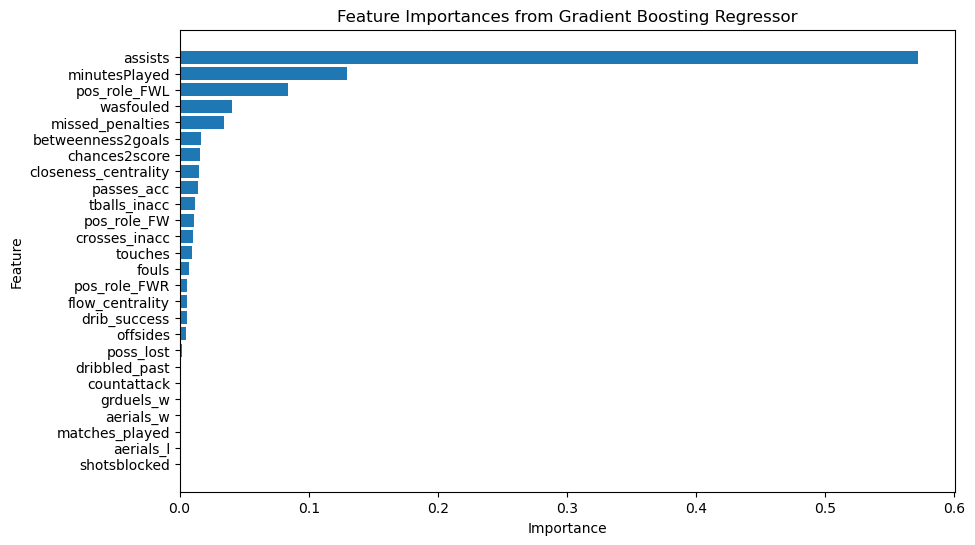

In [15]:
#using gradient boosting to find feature importance in the models 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Sample Data (Replace with your actual data)
# X_train_val_df = pd.DataFrame({...})
# y_train_val_df = pd.Series([...])

# Parameters from the tuning
random_state = 42
learning_rate = 0.1
n_estimators = 200
max_depth = 3

# Train GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
gb_regressor.fit(X_train, y_train)

# Extract feature importances
importances = gb_regressor.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

In [16]:
X.shape

(416, 26)

In [17]:
#using subsets of features and performing parameter tunning it
import pandas as pd
import numpy as np
import random
import time
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])

# Calculate feature importances using RandomForestRegressor on training and validation data
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=3, n_estimators=50, learning_rate=0.2)
gb_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(gb_regressor.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Define subsets of features
feature_subsets = {
    'top_5': feature_importances.index[:5],
    'top_10': feature_importances.index[:10],
    'top_20': feature_importances.index[:20],
    'top_26': feature_importances.index[:26]
}

# Define models with parameter grids for hyperparameter tuning

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    }),
     (LinearRegression(), 'Linear Regression', {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'n_jobs': [-1,2,3]
    })
]

# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, predictions)
        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2, predictions, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None

results = []

for subset_name, features in feature_subsets.items():
    X_train_subset = X_train[features]
    X_val_subset = X_val[features]
    for model, name, params in models:
        mse, mae, rmse, r2, predictions, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
        if best_model is not None:
            results.append({
                'Subset': subset_name,
                'Model': name,
                'MSE': f'{mse:.5f}',
                'MAE': f'{mae:.5f}',
                'RMSE': f'{rmse:.5f}',
                'R2 Score': f'{r2:.5f}',
                'Best Params': best_params,
                'Training Time (s)': f'{training_time:.5f}'
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display options to show the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

# Print the results
print(results_df[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2 Score', 'Best Params', 'Training Time (s)']])

    Subset                         Model       MSE      MAE     RMSE R2 Score  \
0    top_5            XGBoost Regression  19.71931  2.76150  4.44064  0.80102   
1    top_5           AdaBoost Regression  16.04147  2.80812  4.00518  0.83813   
2    top_5                KNN Regression  20.67126  2.59897  4.54657  0.79141   
3    top_5      Decision Tree Regression  40.25701  3.41682  6.34484  0.59378   
4    top_5      Random Forest Regression  21.03836  2.73409  4.58676  0.78771   
5    top_5  Gradient Boosting Regression  18.50530  2.64253  4.30178  0.81327   
6    top_5                SVR Regression  22.60927  2.76238  4.75492  0.77186   
7    top_5     Neural Network Regression  24.20976  2.87532  4.92034  0.75571   
8    top_5             Linear Regression  28.41039  3.54308  5.33014  0.71332   
9   top_10            XGBoost Regression  16.40556  2.29656  4.05038  0.83446   
10  top_10           AdaBoost Regression  16.05831  2.84509  4.00728  0.83796   
11  top_10                KN

In [18]:
print(results_df[['Subset', 'Model', 'MSE',  'MAE', 'R2 Score', 'Best Params', 'Training Time (s)']])

    Subset                         Model       MSE      MAE R2 Score  \
0    top_5            XGBoost Regression  19.71931  2.76150  0.80102   
1    top_5           AdaBoost Regression  16.04147  2.80812  0.83813   
2    top_5                KNN Regression  20.67126  2.59897  0.79141   
3    top_5      Decision Tree Regression  40.25701  3.41682  0.59378   
4    top_5      Random Forest Regression  21.03836  2.73409  0.78771   
5    top_5  Gradient Boosting Regression  18.50530  2.64253  0.81327   
6    top_5                SVR Regression  22.60927  2.76238  0.77186   
7    top_5     Neural Network Regression  24.20976  2.87532  0.75571   
8    top_5             Linear Regression  28.41039  3.54308  0.71332   
9   top_10            XGBoost Regression  16.40556  2.29656  0.83446   
10  top_10           AdaBoost Regression  16.05831  2.84509  0.83796   
11  top_10                KNN Regression  29.74502  3.02065  0.69985   
12  top_10      Decision Tree Regression  38.40990  3.27640  0.6

In [19]:
#visualising the best subsets to use
import pandas as pd

# Assuming results_df is already defined and contains your results
# Convert only the metric columns to numeric values for averaging
metric_columns = ['MSE', 'MAE','RMSE','R2 Score', 'Training Time (s)']
for col in metric_columns:
    results_df[col] = pd.to_numeric(results_df[col], errors='coerce')

# Group by subset and calculate the mean of each metric
subset_averages = results_df.groupby('Subset')[metric_columns].mean().reset_index()

# Display the averaged results
print(subset_averages)

   Subset        MSE       MAE      RMSE  R2 Score  Training Time (s)
0  top_10  24.435822  2.839976  4.874826  0.753428           9.468901
1  top_20  24.824309  2.960934  4.901871  0.749507          14.525211
2  top_26  26.818309  3.053913  5.102091  0.729387          21.670437
3   top_5  23.495792  2.904757  4.803463  0.762912           9.219311


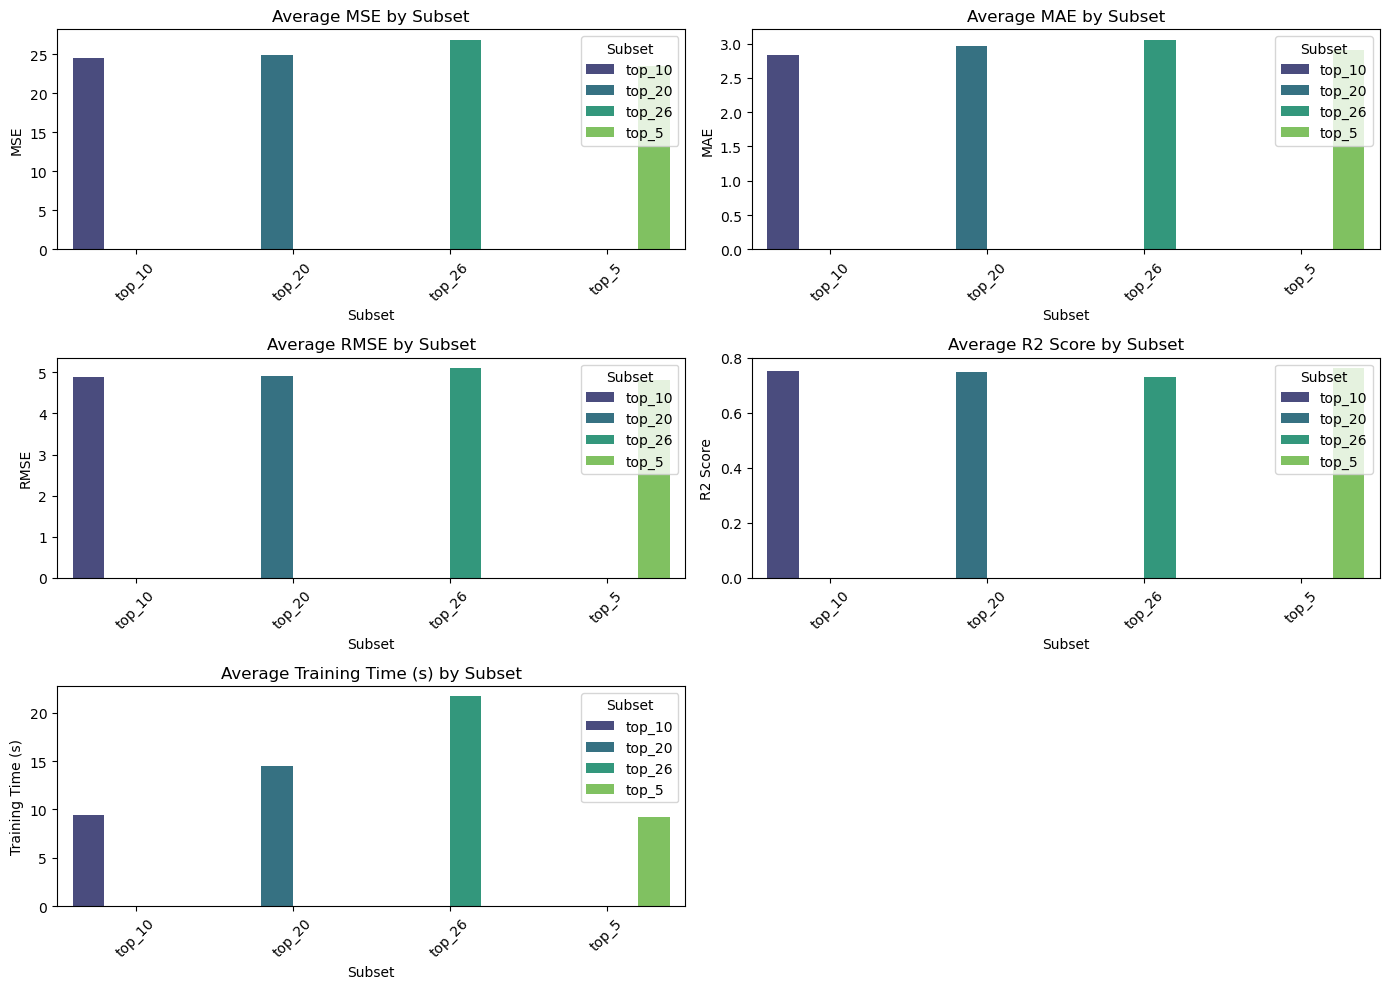

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 10))

# Plotting the averages for each metric
metrics = ['MSE', 'MAE','RMSE','R2 Score', 'Training Time (s)']

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=subset_averages, x='Subset', y=metric, hue='Subset', palette='viridis')
    plt.title(f'Average {metric} by Subset')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

                          Model        MSE       MAE      RMSE        R2  \
0            XGBoost Regression  11.792265  2.034187  3.433987  0.729382   
1           AdaBoost Regression  14.993143  2.504995  3.872098  0.655925   
2                KNN Regression  15.069728  2.049320  3.881975  0.654168   
3      Decision Tree Regression  17.266693  2.299321  4.155321  0.603750   
4      Random Forest Regression  11.109980  2.056549  3.333164  0.745039   
5  Gradient Boosting Regression  11.314582  1.924709  3.363715  0.740344   
6                SVR Regression  13.420386  1.858238  3.663385  0.692018   
7     Neural Network Regression  11.429306  2.218425  3.380726  0.737711   

          R  
0  0.919945  
1  0.905948  
2  0.821951  
3  0.892813  
4  0.910836  
5  0.927607  
6  0.833465  
7  0.873915  


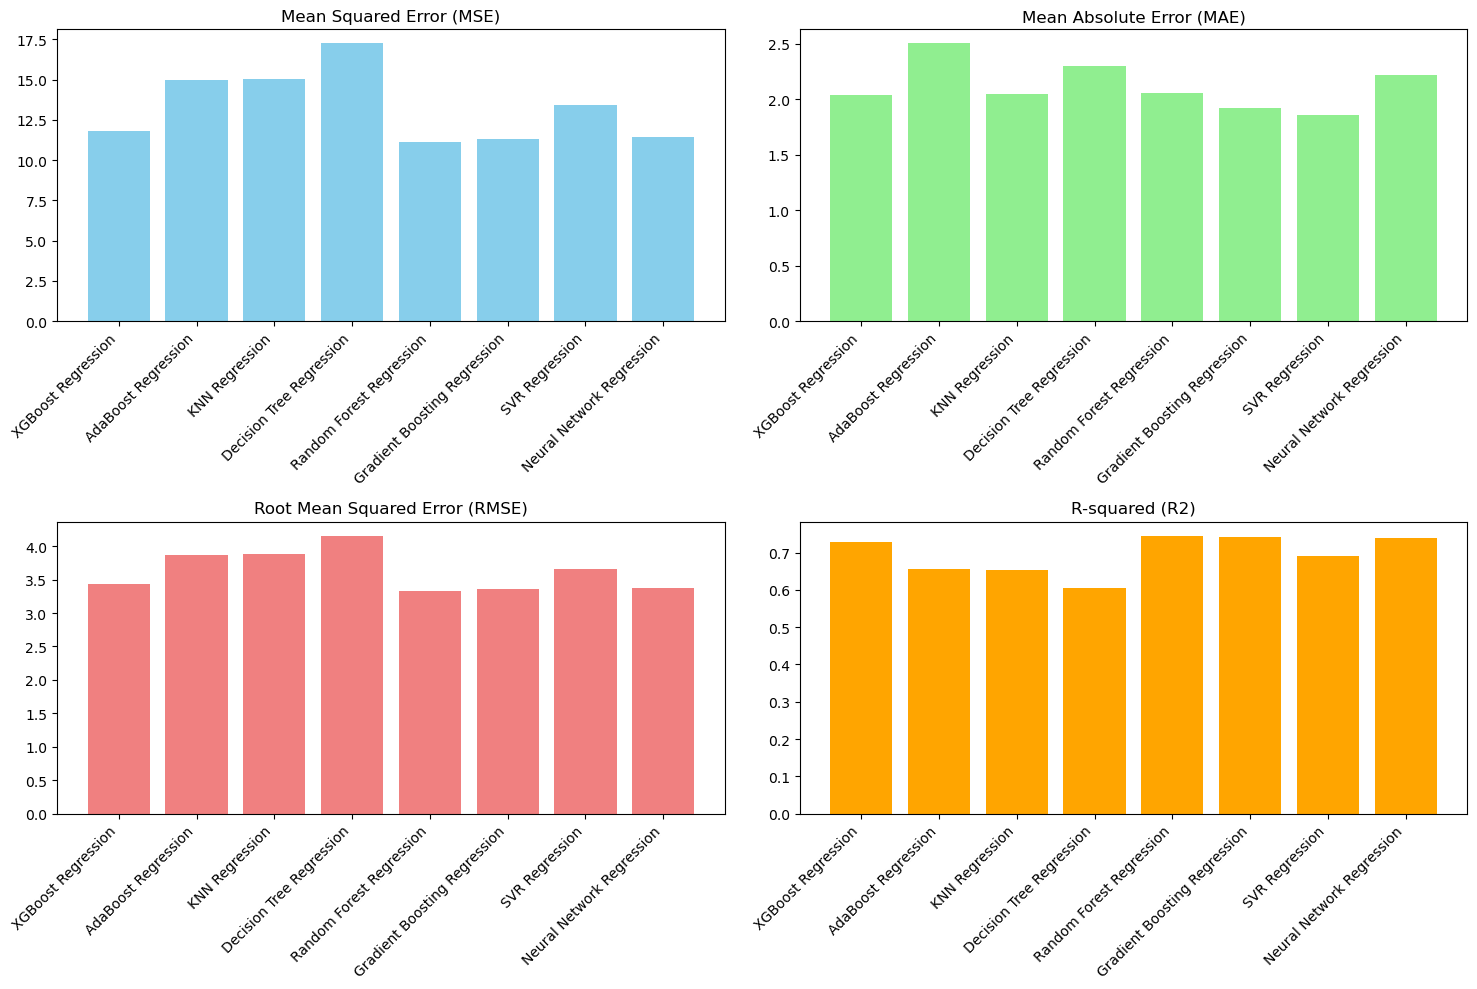

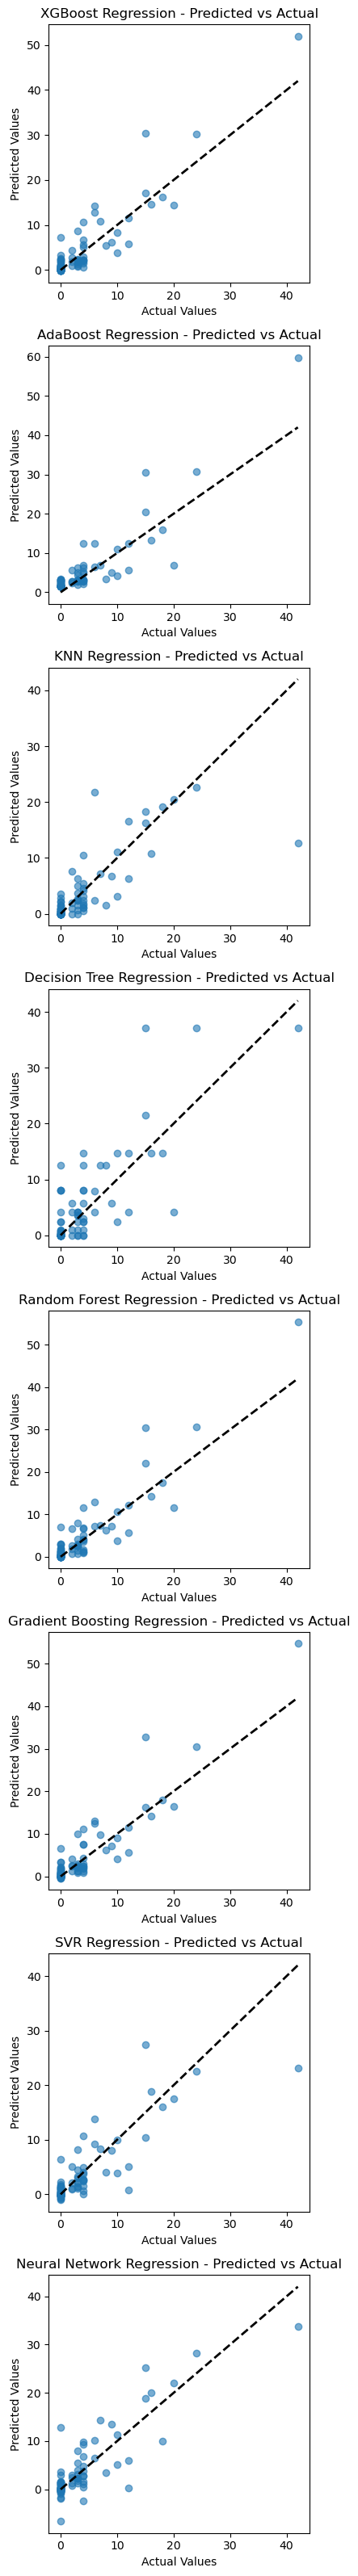

In [21]:
#using top 10 features with the X_train_val dataset and test sets, with the best parameters earlier
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr


# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features]

# Define models with the best parameters found
best_params = {
    'XGBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.1},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'auto'},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 10},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 2},
    'Gradient Boosting Regression': {'n_estimators': 50, 'learning_rate': 0.2, 'max_depth': 3},
    'SVR Regression': {'C': 0.1, 'kernel': 'poly', 'gamma': 'scale'},
    'Neural Network Regression': {'hidden_layer_sizes': (100), 'activation': 'relu', 'solver': 'adam'},
    'Linear Regression': {'copy_X':True, 'fit_intercept':True, 'n_jobs':-1}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

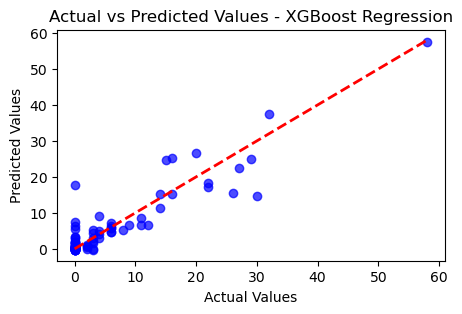

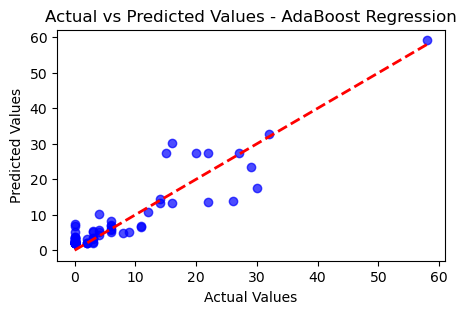

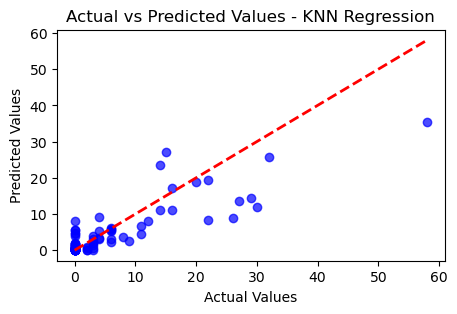

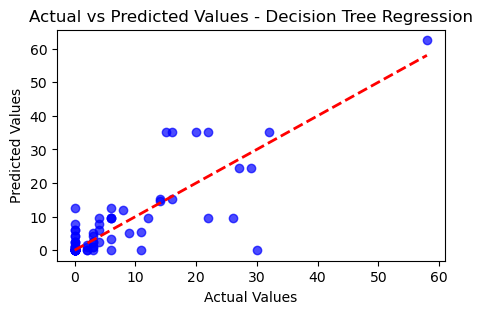

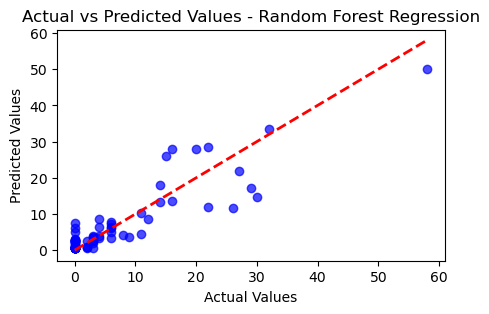

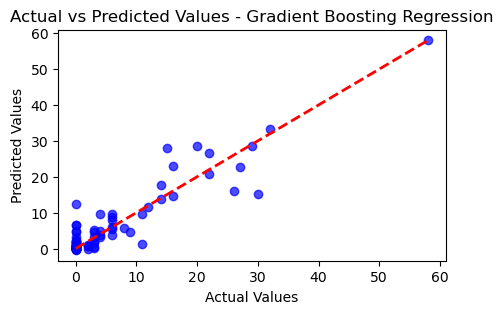

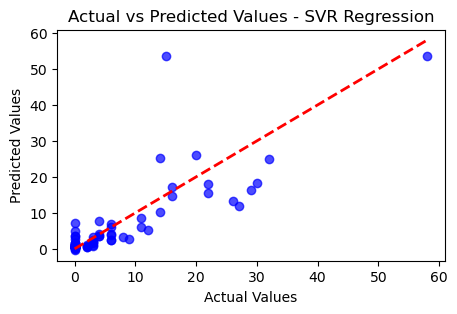

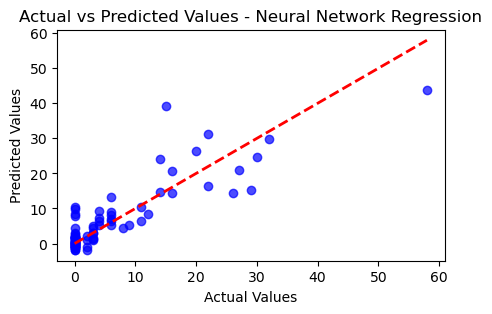

  Subset                         Model       MSE      MAE     RMSE       R2  \
0  top_5            XGBoost Regression  15.96576  2.34092  3.99572  0.83890   
1  top_5           AdaBoost Regression  16.05831  2.84509  4.00728  0.83796   
2  top_5                KNN Regression  29.74502  3.02065  5.45390  0.69985   
3  top_5      Decision Tree Regression  39.91782  3.40009  6.31806  0.59720   
4  top_5      Random Forest Regression  18.50462  2.72813  4.30170  0.81328   
5  top_5  Gradient Boosting Regression  14.53983  2.24607  3.81311  0.85328   
6  top_5                SVR Regression  33.97185  2.90014  5.82854  0.65720   
7  top_5     Neural Network Regression  25.17013  3.09215  5.01698  0.74602   

                                      Best Params Training Time (s)  
0     {'colsample_bytree': 0.7, 'subsample': 0.8}          10.74952  
1                              {'loss': 'linear'}           5.89761  
2                               {'leaf_size': 10}           0.09588  
3       

In [22]:
#using more parameters to tune the top 10 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])


# Define subset of features (top 20 only)
# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_subset = X_train[selected_features]
X_val_subset = X_val[selected_features]

    
# Define models with parameter grids for hyperparameter tuning

models = [
    (XGBRegressor(random_state=random_state,n_estimators=100,learning_rate=0.1,max_depth=3), 'XGBoost Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (AdaBoostRegressor(random_state=random_state,learning_rate=0.1,n_estimators=200), 'AdaBoost Regression', {
        'loss': ['linear', 'square', 'exponential']
    }),
    (KNeighborsRegressor(n_neighbors=7,weights='uniform',algorithm='auto'), 'KNN Regression', {
        'leaf_size': [10, 20, 30, 40, 50]
    }),
    (DecisionTreeRegressor(random_state=random_state,max_depth=10,min_samples_split=10), 'Decision Tree Regression', {
        'min_samples_leaf': [1, 2, 4, 6, 8]
    }),
    (RandomForestRegressor(random_state=random_state,max_depth=3,min_samples_split=2,n_estimators=200), 'Random Forest Regression', {
        'bootstrap': [True, False]
    }),
    (GradientBoostingRegressor(random_state=random_state,learning_rate=0.2,max_depth=3,n_estimators=50), 'Gradient Boosting Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (SVR(C=0.1,gamma='scale',kernel='poly'), 'SVR Regression', {
        'epsilon': [0.1, 0.2, 0.5, 0.3, 0.05]
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000,hidden_layer_sizes= (100,),activation='relu', solver='adam'), 'Neural Network Regression', {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    })
]

# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        mse = mean_squared_error(y_val, predictions)
        rmse = np.sqrt(mse) 
        mae = mean_absolute_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)
        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2, predictions, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None

# Function to plot predicted vs actual values
def plot_predictions(y_val, predictions, model_name):
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, predictions, alpha=0.7, color='b')
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values - {model_name}')
    plt.show()

results = []

for model, name, params in models:
    mse, mae, rmse, r2, predictions, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
    if best_model is not None:
        results.append({
            'Subset': 'top_5',
            'Model': name,
            'MSE': f'{mse:.5f}',
            'MAE': f'{mae:.5f}',
            'RMSE': f'{rmse:.5f}',
            'R2': f'{r2:.5f}',
            'Best Params': best_params,
            'Training Time (s)': f'{training_time:.5f}'
        })
        # Plot predictions vs actual values
        plot_predictions(y_val, predictions, name)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display options to show the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

# Print the results
print(results_df[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2', 'Best Params', 'Training Time (s)']])

                          Model        MSE       MAE      RMSE        R2  \
0            XGBoost Regression   9.872550  1.923896  3.142061  0.773437   
1           AdaBoost Regression  14.993143  2.504995  3.872098  0.655925   
2                KNN Regression  15.069728  2.049320  3.881975  0.654168   
3      Decision Tree Regression  16.286874  2.255593  4.035700  0.626236   
4      Random Forest Regression  11.109980  2.056549  3.333164  0.745039   
5  Gradient Boosting Regression  11.314582  1.924709  3.363715  0.740344   
6                SVR Regression  13.458713  1.969300  3.668612  0.691139   
7     Neural Network Regression  11.429306  2.218425  3.380726  0.737711   

          R  
0  0.920093  
1  0.905948  
2  0.821951  
3  0.886369  
4  0.910836  
5  0.927607  
6  0.831739  
7  0.873915  


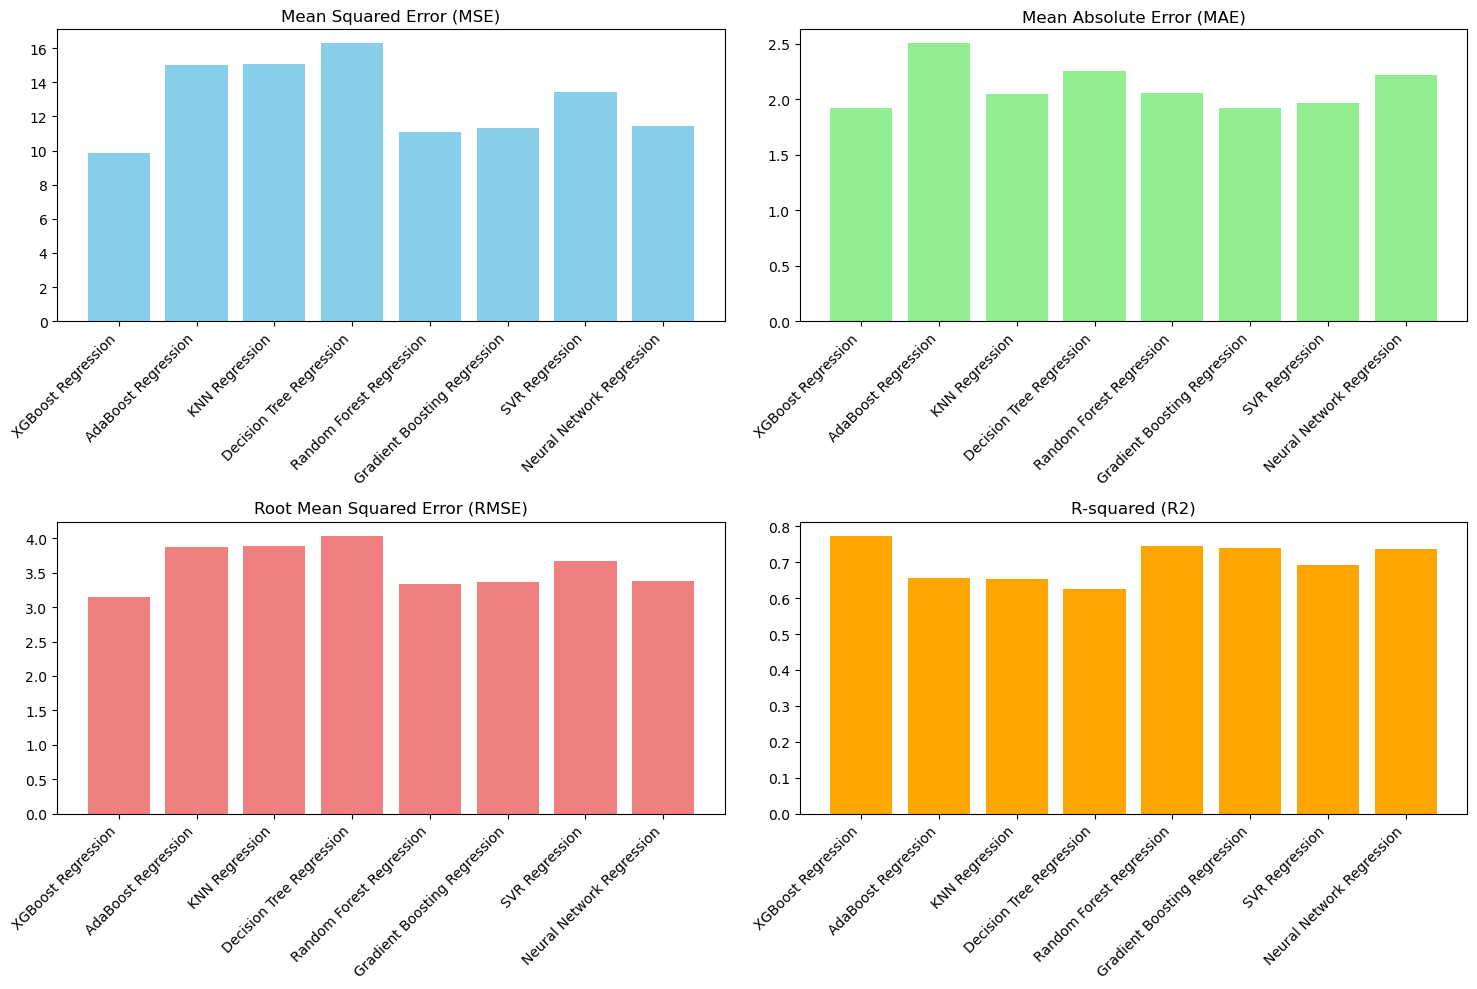

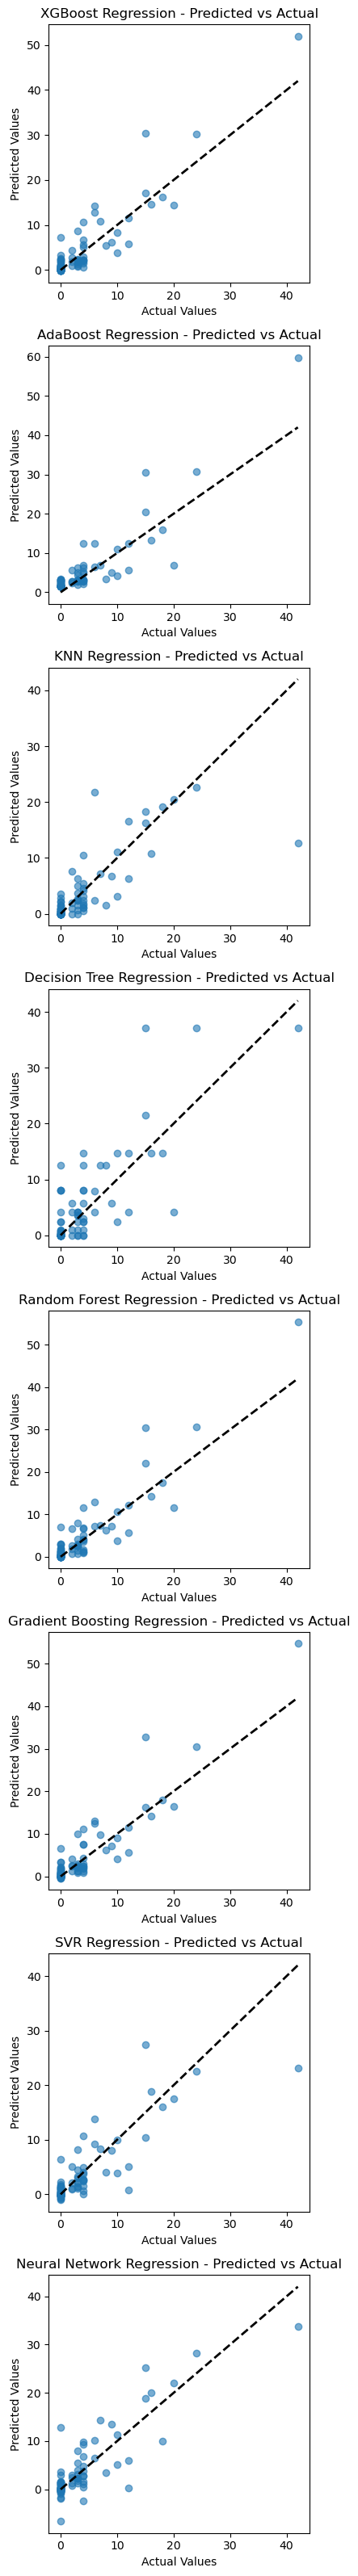

In [23]:
   #using the MORE hyper-parameter tunning on the test set with 10 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 10 features
selected_features = feature_importances.index[:10]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features] 


# Define models with the best parameters found

      
best_params = {
    'XGBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3,'colsample_bytree':0.7,'subsample':0.8},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.1,'loss':'linear'},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'auto','leaf_size':10},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 10,'min_samples_leaf':2},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 2,'bootstrap':True},
    'Gradient Boosting Regression': {'n_estimators': 50, 'learning_rate': 0.2, 'max_depth': 3,'subsample':1.0},
    'SVR Regression': {'C': 0.1, 'kernel': 'poly', 'gamma': 'scale','epsilon':0.5},
    'Neural Network Regression': {'hidden_layer_sizes': (100), 'activation': 'relu', 'solver': 'adam','alpha':0.0001,'learning_rate':'constant'}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)